Comments on vocabulary
 dataset containts images of 28x28 grayscale pixels = 784 total pixels called features
 Each feature represents intensity from 0 to 255 (black)
 There are 24 classes - differnt signs

In [1]:
import sklearn; print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.19.1.


In [2]:
import os
SIGNLANG_PATH = "~/ml/datasets/signLang"

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# load data function
def load_signLand_data(signLang_path=SIGNLANG_PATH, file="sign_mnist_train.csv"):
    csv_path = os.path.join(signLang_path, file)
    return pd.read_csv(csv_path)

## Load train data
signs_train = load_signLand_data()
#signs.head()
signs_train.info()
print("\nTraining data array shape:signs_t ",signs_train.shape)
#print("Training data length: ",len(signs_train.index))
print("\n")
file_test = "sign_mnist_test.csv"
signs_test = load_signLand_data(SIGNLANG_PATH,file_test)
signs_test.info()
print("\nTesting data array shape:signs_t ",signs_test.shape)
#print("Testing data length: ",len(signs_test.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB

Training data array shape:signs_t  (27455, 785)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB

Testing data array shape:signs_t  (7172, 785)


In [3]:
## Process data
#extract labels column into y
y_train = signs_train.loc[:,'label']
y_test = signs_test.loc[:,'label']

#extract pixel array into X
X_train= signs_train
X_train.drop('label',axis=1,inplace=True)
X_test= signs_test
X_test.drop('label',axis=1,inplace=True)


In [4]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#shuffle training set
shuffle_index = np.random.permutation(len(signs_train.index))
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

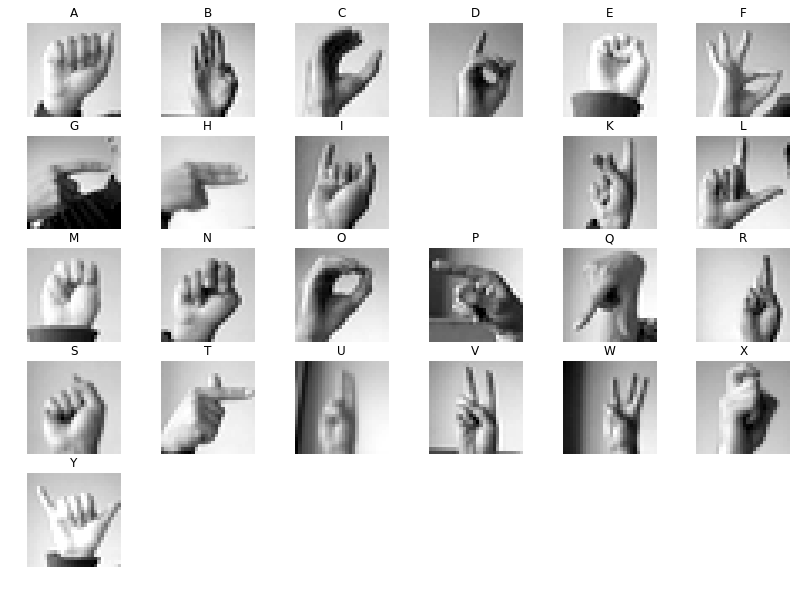

In [5]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    if index == 0:
        SIGN_A = signIndex
    #print(index, signIndex)
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()

# NonLinear SVM Classification

In [6]:
# SVM
# import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# polynomial_svm_clf = Pipeline([
#         ("poly_features", PolynomialFeatures(degree=1)),
#         ("scaler", StandardScaler()),
#         ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
#     ])

# polynomial_svm_clf.fit(X_train, y_train)

# this technique produces memory error, when Polynomial degree > 1 because of it creates a huge number of extra
# features that doesn't fit into memory anymore. (works with degree = 1)
# must use kernel trick

In [7]:
# Plynomial Kernel - a kernel trick to use polynomial fitting without running our of memory
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X_train, y_train)

/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [10]:
## Randomized Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from scipy.stats import randint

# see https://docs.scipy.org/doc/scipy-0.19.0/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'degree':randint(low=2, high=6),
        #'alpha': randint(low=0.01, high=1.0),
        'C':randint(low=1, high=50)
    }

poly_kernel_svm_clf_turbo = SVC(kernel="poly") #use all cpu cores
rnd_search = RandomizedSearchCV(poly_kernel_svm_clf_turbo, param_distributions=param_distribs,
                                n_iter=30, cv=5, scoring='neg_mean_squared_error',
                                verbose=3, n_jobs=4, random_state=42)
rnd_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] degree=5, C=39 ..................................................
[CV] degree=5, C=39 ..................................................
[CV] degree=5, C=39 ..................................................
[CV] degree=5, C=39 ..................................................
[CV] ...... degree=5, C=39, score=-0.009105809506465124, total= 1.4min
[CV] degree=5, C=39 ..................................................
[CV] ...... degree=5, C=39, score=-0.031124863487440844, total= 1.4min
[CV] degree=4, C=29 ..................................................
[CV] ....................... degree=5, C=39, score=-0.0, total= 1.4min
[CV] degree=4, C=29 ..................................................
[CV] ....... degree=5, C=39, score=-0.03644314868804665, total= 1.4min
[CV] degree=4, C=29 ..................................................
[CV] ...... degree=5, C=39, score=-0.038496624703521255, total= 1.4min
[CV] degree=4, 

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 13.8min


[CV] ..... degree=4, C=19, score=-0.0029191753329684362, total= 1.4min
[CV] degree=4, C=11 ..................................................
[CV] ....................... degree=4, C=11, score=-0.0, total= 1.4min
[CV] degree=4, C=11 ..................................................
[CV] ....................... degree=4, C=11, score=-0.0, total= 1.4min
[CV] degree=2, C=24 ..................................................
[CV] ....................... degree=4, C=11, score=-0.0, total= 1.4min
[CV] degree=2, C=24 ..................................................
[CV] ...... degree=4, C=11, score=-0.018221574344023325, total= 1.4min
[CV] degree=2, C=24 ..................................................
[CV] ..... degree=4, C=11, score=-0.0029191753329684362, total= 1.4min
[CV] degree=2, C=24 ..................................................
[CV] ....................... degree=2, C=24, score=-0.0, total= 1.6min
[CV] degree=2, C=24 ..................................................
[CV] .

[CV] ....................... degree=2, C=44, score=-0.0, total= 1.6min
[CV] degree=4, C=49 ..................................................
[CV] ....................... degree=2, C=44, score=-0.0, total= 1.6min
[CV] degree=4, C=49 ..................................................
[CV] ....................... degree=2, C=44, score=-0.0, total= 1.6min
[CV] degree=4, C=49 ..................................................
[CV] ....................... degree=4, C=49, score=-0.0, total= 1.4min
[CV] degree=4, C=49 ..................................................
[CV] ....................... degree=4, C=49, score=-0.0, total= 1.4min
[CV] degree=5, C=42 ..................................................
[CV] ....................... degree=4, C=49, score=-0.0, total= 1.4min
[CV] degree=5, C=42 ..................................................
[CV] ...... degree=4, C=49, score=-0.018221574344023325, total= 1.4min
[CV] degree=5, C=42 ..................................................
[CV] .

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 73.9min


[CV] ........................ degree=2, C=7, score=-0.0, total= 1.6min
[CV] degree=2, C=7 ...................................................
[CV] ........................ degree=2, C=7, score=-0.0, total= 1.6min
[CV] degree=4, C=9 ...................................................
[CV] ........................ degree=2, C=7, score=-0.0, total= 1.6min
[CV] degree=4, C=9 ...................................................
[CV] ........................ degree=2, C=7, score=-0.0, total= 1.6min
[CV] degree=4, C=9 ...................................................
[CV] ........................ degree=4, C=9, score=-0.0, total= 1.4min
[CV] degree=4, C=9 ...................................................
[CV] ........................ degree=2, C=7, score=-0.0, total= 1.6min
[CV] degree=4, C=9 ...................................................
[CV] ........................ degree=4, C=9, score=-0.0, total= 1.4min
[CV] degree=5, C=18 ..................................................
[CV] .

[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed: 91.8min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=4,
          param_distributions={'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb0629c9da0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb0629f8b00>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=3)

In [11]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.151721740144 {'degree': 5, 'C': 39}
0.0650007354651 {'degree': 4, 'C': 29}
0.151721740144 {'degree': 5, 'C': 43}
0.0650007354651 {'degree': 4, 'C': 21}
0.0650007354651 {'degree': 4, 'C': 19}
0.0650007354651 {'degree': 4, 'C': 11}
-0.0 {'degree': 2, 'C': 24}
0.151721740144 {'degree': 5, 'C': 36}
0.0650007354651 {'degree': 4, 'C': 24}
-0.0 {'degree': 2, 'C': 22}
0.151721740144 {'degree': 5, 'C': 2}
-0.0 {'degree': 3, 'C': 44}
-0.0 {'degree': 3, 'C': 38}
-0.0 {'degree': 2, 'C': 21}
-0.0 {'degree': 3, 'C': 12}
-0.0 {'degree': 2, 'C': 22}
-0.0 {'degree': 2, 'C': 44}
0.0650007354651 {'degree': 4, 'C': 49}
0.151721740144 {'degree': 5, 'C': 42}
0.151721740144 {'degree': 5, 'C': 28}
0.0650007354651 {'degree': 4, 'C': 16}
-0.0 {'degree': 3, 'C': 47}
0.0650007354651 {'degree': 4, 'C': 44}
-0.0 {'degree': 2, 'C': 3}
-0.0 {'degree': 2, 'C': 7}
0.0650007354651 {'degree': 4, 'C': 9}
0.151721740144 {'degree': 5, 'C': 18}
0.151721740144 {'degree': 5, 'C': 25}
-0.0 {'degree': 3, 'C': 14}
-0.0 {'degree

In [13]:
from sklearn.metrics import accuracy_score
y_pred = rnd_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.79196876742889011

In [14]:
rnd_search.best_params_

{'C': 24, 'degree': 2}

In [15]:
rnd_search.best_score_

0.0

In [45]:
# manually test SVM with found hyperparameters
#poly_kernel2 = SVC(kernel="poly", C=5, degree=3) #use all cpu cores
poly_kernel2 = Pipeline([
        ("scaler", StandardScaler()),
        ("poly_kernel2", SVC(kernel="poly", degree=2, C=24 ))
    ])
poly_kernel2.fit(X_train, y_train)

/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly_kernel2', SVC(C=24, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [46]:

p_kernel_score2 = poly_kernel2.score(X_test, y_test,sample_weight=None)
print(p_kernel_score2)

/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.853179029559


In [ ]:
# Gaussian RBF kernel - the similarity features method as alternative to Poly Kernel
# !!! long processing time, ran about 30 min, O(m^3 * n)
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X_train, y_train)

## Test Scores for all three SVM methodes

In [ ]:
#p_score = polynomial_svm_clf.score(X_test, y_test,sample_weight=None)
p_kernel_score = poly_kernel_svm_clf.score(X_test, y_test,sample_weight=None)
rbf_kernel_score = rbf_kernel_svm_clf.score(X_test, y_test,sample_weight=None)
#print("Test Scores:",p_score, p_kernel_score, rbf_kernel_score)
print("Test Scores:", p_kernel_score, rbf_kernel_score)

In [14]:
p_kernel_score

0.84467373117679867

In [15]:
rbf_kernel_score

0.020078081427774678

## Continue with Polynomial Kernel method and cross-validation

In [19]:
# confusion matric computation returning predictions made on each test fold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(poly_kernel_svm_clf, X_train, y_train, cv=3, n_jobs=1)
#confusion_matrix(y_train, y_train_pred)


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
# Precision of the classifier =  TP/(TP + FP)
# Recall (sensitivity) = TP/(TP+FN)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred, average='micro'  )

0.99996357676197412

In [21]:
recall_score(y_train, y_train_pred, average='micro')

0.99996357676197412

In [22]:
#Combining precision and recall into once metric - F1 score (harmonic mean)
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average='macro')

0.99996531347989415

In [28]:
#cross-validation using K-fold with 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(poly_kernel_svm_clf, X_train, y_train, cv=3,scoring="accuracy")


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 1.       ,  1.       ,  0.9998906])

# ERROR ANALYSIS

In [29]:
#calculaing confusion matrix for SVM

conf_mx = confusion_matrix(y_train, y_train_pred)

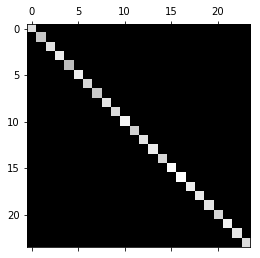

In [30]:
# plotting confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [31]:
#comparing error rates rather than absolute number of erors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

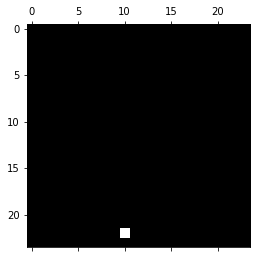

In [32]:
np.fill_diagonal(norm_conf_mx, 0)
#plt.figure(figsize=(10, 10))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# rows represent actual classes
# columns represent predicted classes
# bright columsn show that 17 and 18 are often misclassified